# Regresión Lineal Multivariable

En este notebook se analiza el dataset [House Prices - Advanced Regression Techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/) de la plataforma de Kaggle y se busará predecir el valor de venta de las casas 

## 1. Cargando datos

Primero importando las librerías que se van a usar y leyendo los datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 2. Explorando datos

Analizando las caracteristicas de los datos de train para esto resuelvo primero preguntas basicas sobre el dataset

¿De que tamaño es el dataset?

In [4]:
df_train.shape

(1460, 81)

¿Cuales son sus columnas? 

In [5]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

¿De que tipo de variable son las columnas?

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

¿Como se comportan las variables númericas?

In [7]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


¿Como se comportan las variables categoricas? 

In [8]:
df_train.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


## 3. Estudio de la variable SalePrice (Valor de Venta)

Primero definiendo el estilo que se usaran en las gráficas y el tamaño de la fuente

In [9]:
sns.set_style('darkgrid')
sns.set_context('notebook', font_scale=1.5)

Con el fin de observar graficamente el comportamiento de la variable SalePrice, que indica el valor de venta de las casas, se realizó una grafica de distribución

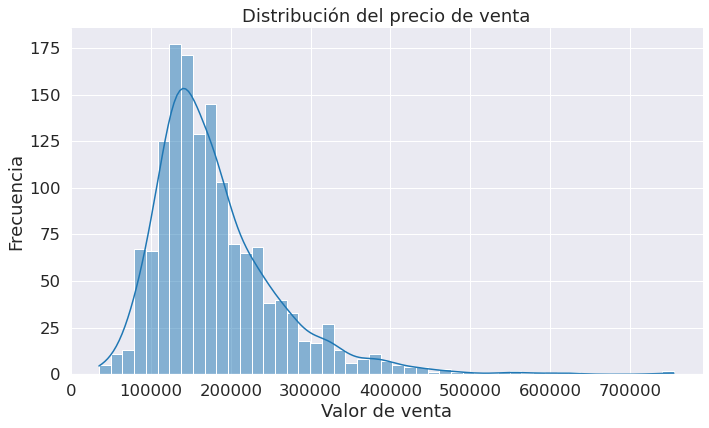

In [10]:
sns.displot(df_train['SalePrice'], kde=True, height=6, aspect=1.7)
plt.title('Distribución del precio de venta')
plt.xlabel('Valor de venta')
plt.ylabel('Frecuencia')
plt.show()

In [11]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

De la grafica anterior se observa de forma clara los outliers, por lo que hay que identificarlos de forma clara. Para esto el criterio utlizado es el del rango intercuartilico ($RIQ$) definido por 
\begin{equation}
RIQ \equiv Q1-Q3
\end{equation}
Donde $Q1$ es el primer cuartil y $Q3$ es el tercer cuartil. Entonces consideramos a los outliner como los valores que se encuentran fuera del rango 
\begin{equation}\tag{2}
outliner \notin [Q1 -(1.5\cdot RIQ), Q3 +(1.5\cdot RIQ)]
\end{equation}
Veamos cuantos outliner se tienen con este criterio

In [12]:
def outlier(data, variable):
    q1 = data[variable].quantile(0.25)
    q3 = data[variable].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - (1.5 * iqr)
    upper = q3 + (1.5 * iqr)
    ind_outliers = data[(data[variable] < lower) | (data[variable] > upper)][variable].index
    return ind_outliers


In [13]:
ind_outliers_SP = outlier(df_train, 'SalePrice')
print(len(ind_outliers_SP))

61


Como solo se tienen 61 outliners se decidió eliminarlos para no generar ruido en la predicción, por lo que ahora se tiene la siguiente distribución

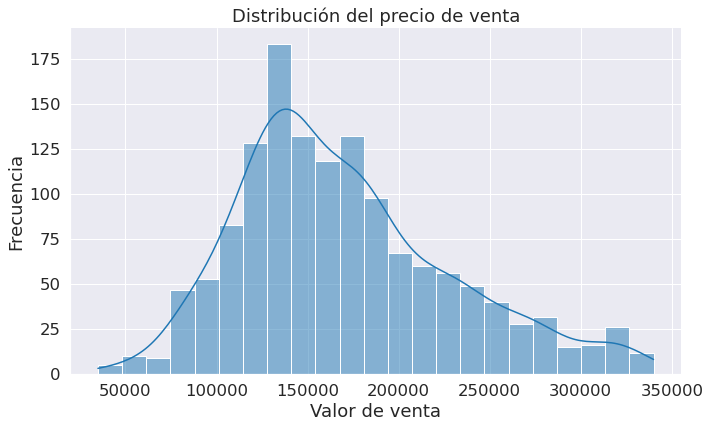

In [14]:
df_train_clean = df_train.drop(ind_outliers_SP)
sns.displot(data=df_train_clean, x='SalePrice', kde=True, height=6, aspect=1.7)
plt.title('Distribución del precio de venta')
plt.xlabel('Valor de venta')
plt.ylabel('Frecuencia')
plt.show()

In [15]:
df_train_clean['SalePrice'].describe()

count      1399.000000
mean     170237.127234
std       59230.130817
min       34900.000000
25%      129000.000000
50%      159500.000000
75%      203500.000000
max      340000.000000
Name: SalePrice, dtype: float64

Ahora es interesante conocer la relación entre las variables númericas, para esto se apoyó del coeficiente de correlación de Pearson sobre una muestra $\lbrace(x_i,y_i)\rbrace_{y=1}^N$, que se define como 
\begin{equation}\tag{3}
r_{xy}=\dfrac{\sum_{i=1}^N(x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum_{i=1}^N(x_i-\bar{x})^2}\sqrt{\sum_{i=1}^N(y_i-\bar{y})^2}}
\end{equation}
Donde $\bar{x}, \bar{y}$ son los promedios de las variales $x$ & $y$ respectivamente y $N$ el numero de elementos.

Se calculó la matriz de correlación que muestra el coeficiente de correlación de Pearson entre todas las variables numericas del dataset y para una mejor visualización se muestra con un mapa de calor

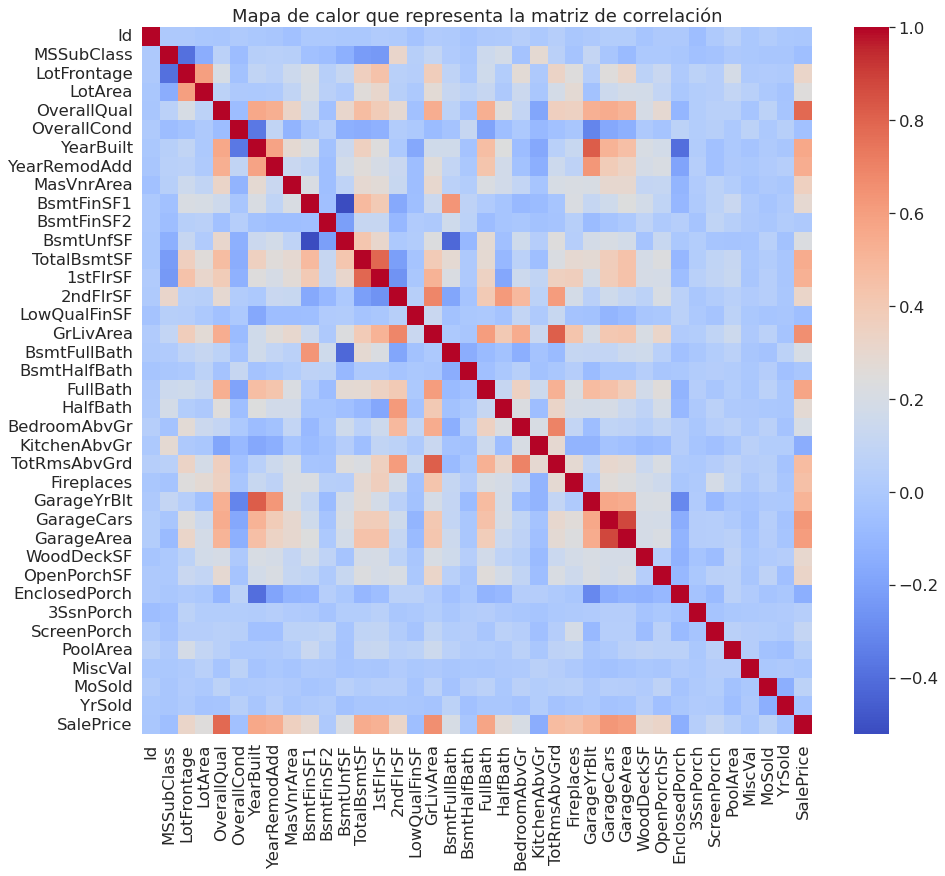

In [16]:
corr_matrix = df_train_clean.corr()
plt.figure(figsize=(15,13))
sns.heatmap(corr_matrix, cmap='coolwarm', cbar=True);
plt.title('Mapa de calor que representa la matriz de correlación')
plt.show()

En particular en este analisis el interes es en la variable SalePrice por lo que veamos primero las 10 correlaciones menores para ver si hay una correlación negativa

In [17]:
df_menor_corr = pd.DataFrame(corr_matrix['SalePrice'].sort_values(ascending=True)[0:10])
df_menor_corr

,SalePrice
KitchenAbvGr,-0.147385
EnclosedPorch,-0.144996
MSSubClass,-0.060111
LowQualFinSF,-0.058086
OverallCond,-0.048005
YrSold,-0.028245
BsmtHalfBath,-0.018827
MiscVal,-0.012872
Id,-0.011984
BsmtFinSF2,0.007154


Ahora veamos las 10 correlaciones más altas

In [18]:
df_mayor_corr = pd.DataFrame(corr_matrix['SalePrice'].sort_values(ascending=False)[0:10])
df_mayor_corr

,SalePrice
SalePrice,1.000000
OverallQual,0.784294
GrLivArea,0.661325
GarageCars,0.628013
GarageArea,0.607230
FullBath,0.577369
YearBuilt,0.564558
TotalBsmtSF,0.543508
YearRemodAdd,0.541161
1stFlrSF,0.522785


Como se muestra en $(3)$ se tiene una correlación perfecta en -1 o en 1, así notemos que las 10 menores correlaciones con SalePrice no se acercan a -1 si no que se acercan a 0 por lo que estas variables no se relacionan con SalePrice. Por otro lado las 10 mayores correlaciones si se muestran variables con correlaciones más cercanas a 1, por lo tanto veamos como se distribuyen estas variables

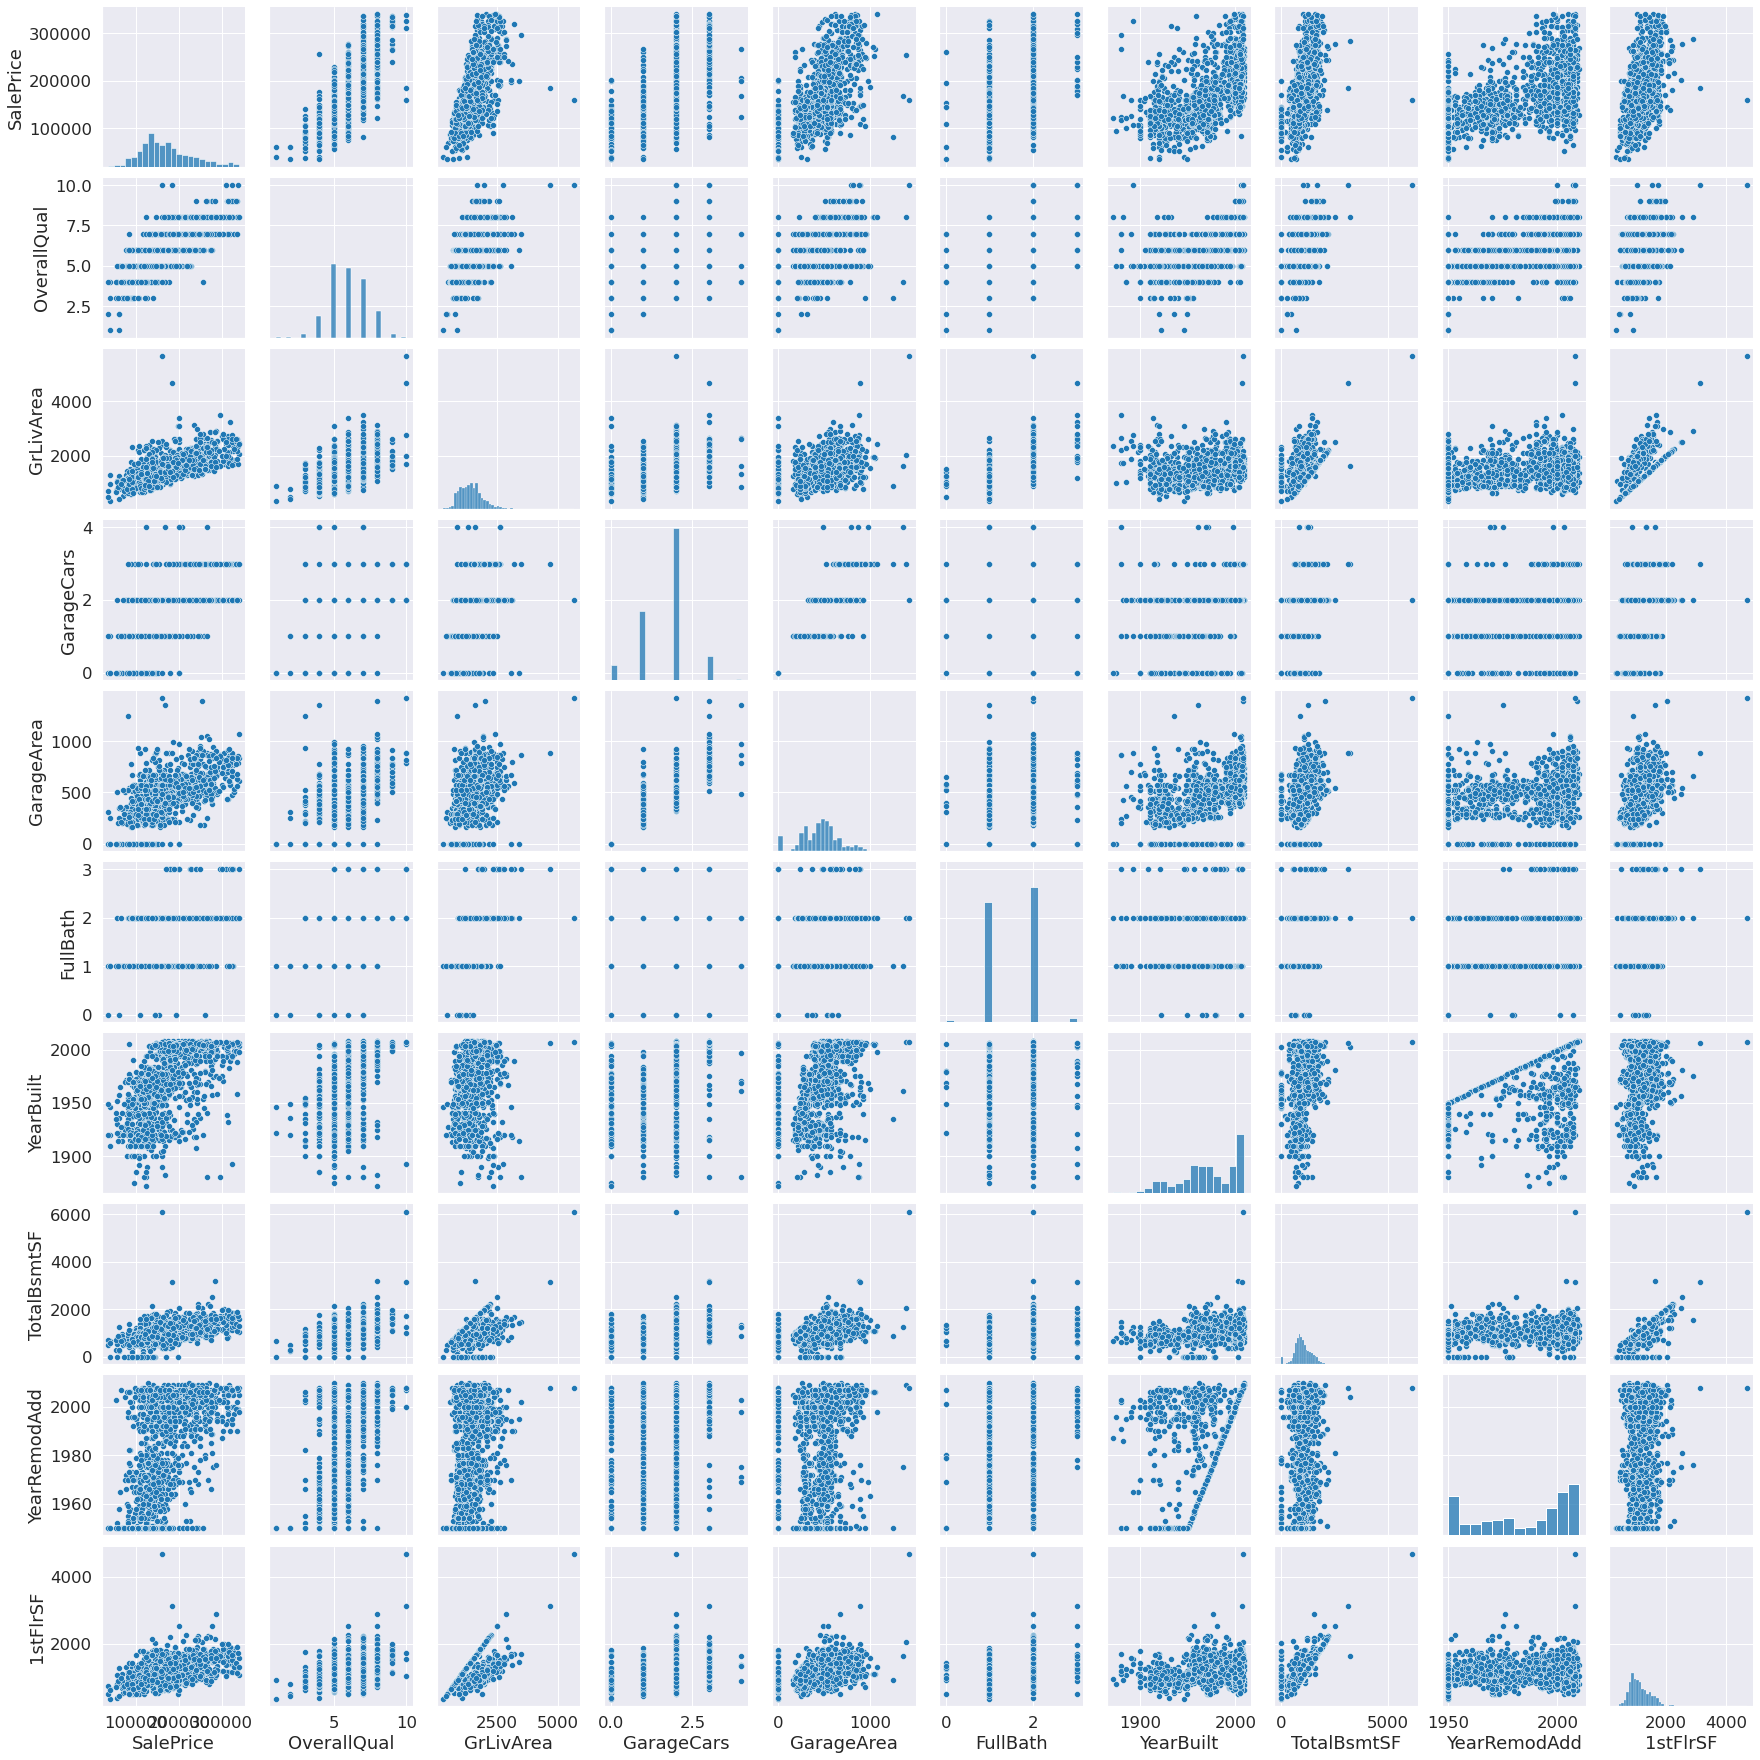

In [19]:
features = list(corr_matrix['SalePrice'].sort_values(ascending=False)[0:10].index)
sns.pairplot(df_train_clean[features])
plt.show()

## 4. Preparando datos 

La variable que tiene mayor correlación con SalePrice es OverallQual que califica el material y acabado de la casa, siendo 
- 10 $\to$ Muy excelente 
- 9 $\to$ Excelete
- 8 $\to$ Muy bien
- 7 $\to$ Bien
- 6 $\to$ Sobre el promedio
- 5 $\to$ Promedio
- 4 $\to$ Debajo del promedio
- 3 $\to$ Justa
- 2 $\to$ Pobre
- 1 $\to$ Muy pobre

La segunda variable con mayor correlación es GrLivArea que representan los pies cuadrados de superficie habitable sobre el nivel del suelo

Y la tercer variable con mayor correlación es GarageCars que representa la capacidad de autos en el garage

Estas variables son las que se usarón en el analisis, por lo que hay que verificar si tienen valores nulos

In [20]:
df_train_num_nulos = pd.DataFrame(df_train_clean[['OverallQual','GrLivArea','GarageCars']].isnull().sum(), columns=['Num-Nulos'])
df_train_num_nulos

,Num-Nulos
OverallQual,0
GrLivArea,0
GarageCars,0


Con el fin de observar los outliners de OverallQual se creo una grafica de caja 

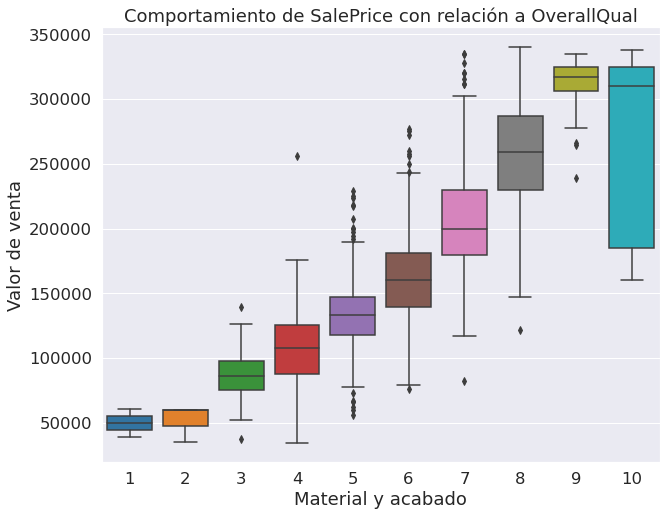

In [21]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df_train_clean, x='OverallQual', y='SalePrice')
plt.xlabel('Material y acabado')
plt.ylabel('Valor de venta')
plt.title('Comportamiento de SalePrice con relación a OverallQual')
plt.show()

De la grafica anterior se observa claramente las existencia de outliers por lo que de igual forma se usó el criterio de RIQ, para identificarlos y eliminarlos

In [22]:
def outliers_dummie(data, variable, num):
    df = data[data[variable] == num]
    q1 = df['SalePrice'].quantile(0.25)
    q3 = df['SalePrice'].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - (1.5 * iqr)
    upper = q3 + (1.5 * iqr)
    ind = list(df[(df['SalePrice'] < lower) | (df['SalePrice'] > upper)].index)
    return ind 

In [23]:
for i in range(1,11):
    ind = outliers_dummie(df_train_clean, 'OverallQual', i)
    df_train_clean = df_train_clean.drop(ind)

Con el fin de observar los outliners de GrLivArea se creo una grafica de dispersión 

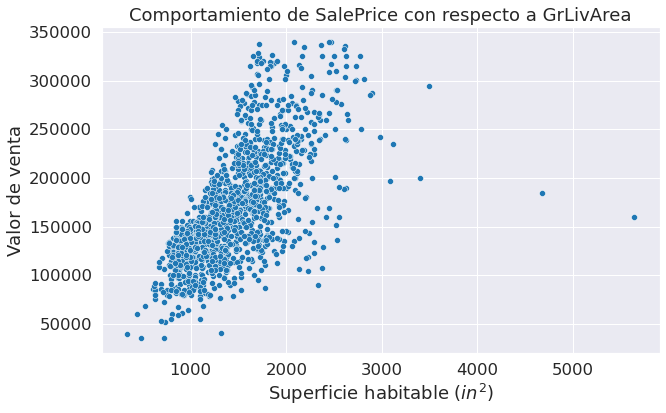

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_train_clean, x='GrLivArea',y='SalePrice')
plt.ylabel('Valor de venta')
plt.xlabel('Superficie habitable $(in^2)$')
plt.title('Comportamiento de SalePrice con respecto a GrLivArea')
plt.show()

Como se presentan outliers para identificarlos y descartarlos se usa el criterio de RIQ, por lo que ahora se tiene

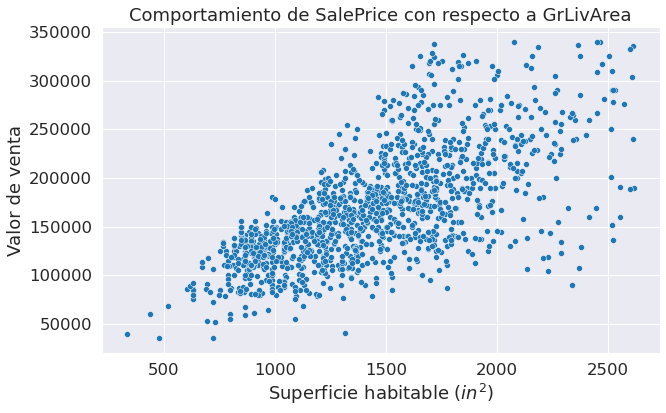

In [25]:
ind_outlier_GLA = outlier(df_train_clean,'GrLivArea')
df_train_clean = df_train_clean.drop(ind_outlier_GLA)
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_train_clean, x='GrLivArea', y='SalePrice')
plt.ylabel('Valor de venta')
plt.xlabel('Superficie habitable $(in^2)$')
plt.title('Comportamiento de SalePrice con respecto a GrLivArea')
plt.show()

Con el fin de observar los outliners de GarageCars se creo una grafica de caja 

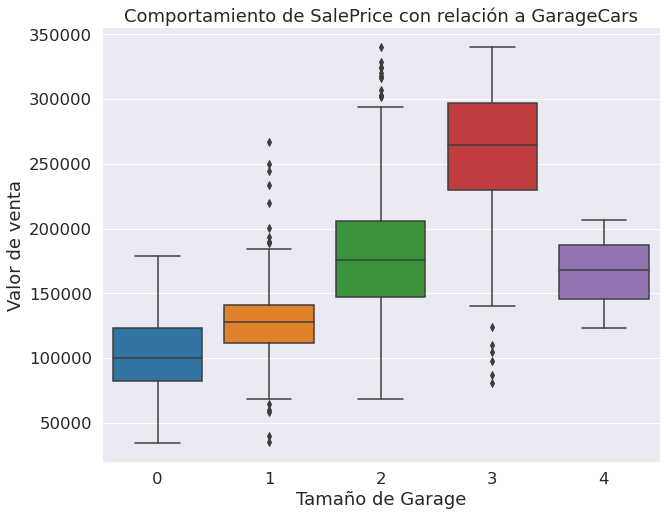

In [26]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df_train_clean, x='GarageCars', y='SalePrice')
plt.xlabel('Tamaño de Garage')
plt.ylabel('Valor de venta')
plt.title('Comportamiento de SalePrice con relación a GarageCars')
plt.show()

De la grafica anterior se observa claramente las existencia de outliers por lo que de igual forma se usó el criterio de RIQ, para identificarlos y eliminarlos

In [27]:
for i in range(0,5):
    ind = outliers_dummie(df_train_clean, 'GarageCars', i)
    df_train_clean = df_train_clean.drop(ind)

Por lo que ahora, ¿Cuál es la forma del Data Frame?

In [28]:
df_train_clean.shape

(1305, 81)

Para poder utilizar correctamente OverallQual y GarageCars en la regresión lineal es necesario separar estas varaiables a variables biinarias

In [29]:
df_train_clean = pd.get_dummies(df_train_clean, columns=['OverallQual','GarageCars'])
df_train_clean.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF

Por lo que ahora se tienen las columnas (OverallQual_1, OverallQual_2, OverallQual_3, OverallQual_4, OverallQual_5, OverallQual_6, OverallQual_7, OverallQual_8, OverallQual_9, OverallQual_10, GarageCars_0, GarageCars_1, GarageCars_2, GarageCars_3, GarageCars_4).

## 5. Modelo

Para realizar la predicción se usó el modelo de regresión lineal con las variables dummies y GrLivArea, por lo que se creó y entreno el modelo  

In [30]:
from sklearn.linear_model import LinearRegression

features = ['OverallQual_1', 'OverallQual_2', 'OverallQual_3', 'OverallQual_4',
       'OverallQual_5', 'OverallQual_6', 'OverallQual_7', 'OverallQual_8',
       'OverallQual_9', 'OverallQual_10', 'GarageCars_0', 'GarageCars_1',
       'GarageCars_2', 'GarageCars_3', 'GarageCars_4', 'GrLivArea']
x_train =  df_train_clean[features].values
y_train = df_train_clean['SalePrice'].values

reg = LinearRegression()

reg.fit(x_train, y_train)

LinearRegression()

Por lo que se obtenido la función
\begin{equation}\tag{4}
f(x_1,x_2,\dots,x_{10})=\sum_{i=1}^{10}\alpha_ix_i=\alpha_1x_1+\alpha_2x_2+\cdots+\alpha_{10}x_{10}
\end{equation}
Donde $x_i$ es el valor de OverallQual_i y $\alpha_i$ constantes $\forall i = 1,\cdots,10$.


## 6. Predicción

Primero hay que comporbar si hay valores nulos en OverallQual en el dataset de prueba

In [31]:
df_pred_nulos = pd.DataFrame(df_test[['OverallQual','GrLivArea','GarageCars']].isnull().sum(), columns=['Num-Nulos'])
df_pred_nulos

,Num-Nulos
OverallQual,0
GrLivArea,0
GarageCars,1


Como se tiene un valor nulo en GarageCars en el dataset de prueba se cambia por el valor promedio 

In [32]:
df_test['GarageCars'] = df_test['GarageCars'].fillna(round(df_test['GarageCars'].mean())) 

Ahora usando la función anterior podemos realizar la predición del valor de venta en el dataset de prueba para esto primero hay que crear las variables binarias de las variables OverallQual y GarageCars y ya con esto se realizó la predicción 

In [33]:
df_pred = pd.get_dummies(df_test, columns=['OverallQual','GarageCars'])
df_pred.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF

In [34]:
test_features =  ['OverallQual_1',
       'OverallQual_2', 'OverallQual_3', 'OverallQual_4', 'OverallQual_5',
       'OverallQual_6', 'OverallQual_7', 'OverallQual_8', 'OverallQual_9',
       'OverallQual_10', 'GarageCars_0.0', 'GarageCars_1.0', 'GarageCars_2.0',
       'GarageCars_3.0', 'GarageCars_4.0', 'GrLivArea']

x_test = df_pred[test_features].values

y_pred = reg.predict(x_test)

## 7. Evaluación

Para la evaluación del modelo hay que evaluar la predicción sobre el dataset de prueba, para esto hay que enviar los resultados obtenidos a kaggle ya que solo la plataforma conoce los valores de SalePrice del dataset de prueba y los evalua con la raiz del error cuadratico medio que se define como
\begin{equation}\tag{5}
RECM=\sqrt{\dfrac{\sum_{i=1}^N(\widehat{y_i}-y_i)^2}{N}}
\end{equation}
Donde $N$ es el numero de elementos, $\widehat{y_i}$ es el valor predicho y $y_i$ el valor real. Por lo que entre más cercano a 0 es mejor la predicción.

Para enviar los valores a kaggle hay que preparar los datos como los pide la plataforma 

In [35]:
output = pd.DataFrame({'Id': df_pred.Id, 'SalePrice': y_pred})
output
output.to_csv('pred.csv', index=False)

Al enviar el arvhico csv a kaggle se obtiene el siguiente resultado

![](eval.png)